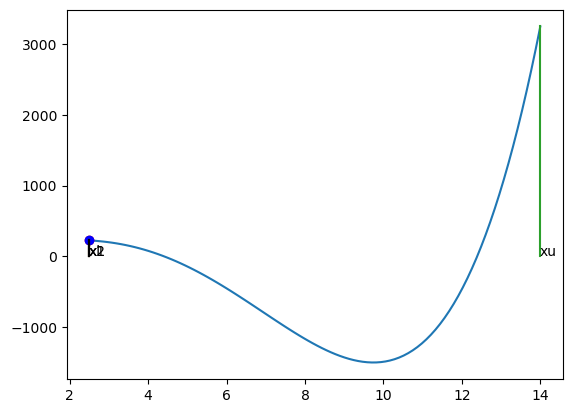

start=2.5, direction=1.0
f=223.3, grad=-32.5
2.5 9.73815542253489


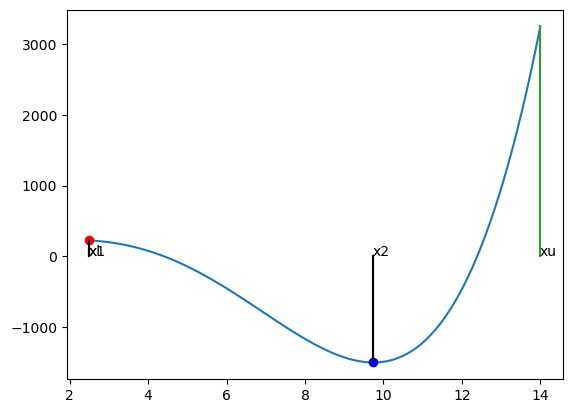

a: 7.238 Feval:   7 It:   1 Err: 7.238 x: 9.7 y: -1507.1 g: -1.5
9.73815542253489 9.743397305312122


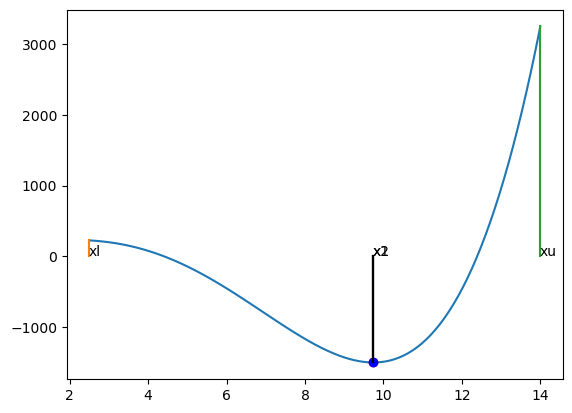

a: 0.005 Feval:   8 It:   2 Err: 0.005 x: 9.7 y: -1507.1 g: -0.0


In [22]:
import numpy as np
from scipy.optimize import line_search
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
 
 
def function(x):
	#return (-5.0 + x)**2.0
    return x**4-16*x**3+45*x**2-20*x+203
    #return -(x**4-2*x**4-23*x**3-12*x**2+36*x)
    #return x**5 - 2*x**4 - 23*x**3 - 12* x **2 + 36*x

def gradient(x):
	#return 2.0 * (-5.0 + x)
    return 4*x**3-48*x**2+90*x-20
    #return -(5*x**4-8*x**3-69*x**2-24*x+36)
    #return 5*x**4 - 8 * x **3 - 69 * x **2 -24*x + 36

def plot_graph(xl,xu,x1,x2):
    #clear_output(wait=True)
    
    #plot function graph
    plt.plot(x,y)
    #plt.plot([xl,xu],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,function(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,function(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,function(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,function(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,function(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,function(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,function(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,function(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    #plt.ylim([-1.2,1.2])
    plt.show()

def optimize_line_search(xl,xu,point,direct,mode,et,f,grad):
    it=0
    e=1

    while e>=et:
        result = line_search(f, grad, point, direct)
        # summarize the result
        alpha = result[0]
        if alpha is None:
            raise ValueError('It seems Alpha did not conferge')
        # define objective function minima
        end = point + alpha * direct
        print(point,end)
        plot_graph(xl,xu,point,end)
        plt.show()
        it+=1
        e=abs(point-end)
        print('a: %.3f Feval: %3d It: %3d Err: %.3f x: %.1f y: %.1f g: %.1f' % (alpha,result[1],it,e,end,f(end),grad(end)))
        point=end
        time.sleep(1)
  
# define the search interval and line search direction
xl,xu,direction = 2.5,14,1.0
#xl,xu,direction = -3,-1.1,-0.5
#xl,xu,direction = 2,3,0.5

# define x0 as the initial value of the interval
point = xl

# get the data to plot the function
x=np.linspace(xl,xu,100)
y=function(x)
plot_graph(xl,xu,point,point)


# print the initial conditions
print('start=%.1f, direction=%.1f' % (point, direction))
print('f=%.1f, grad=%.1f' % (function(point), gradient(point)))

# run the optimization
optimize_line_search(xl,xu,point, direction,'min',0.05,function,gradient)

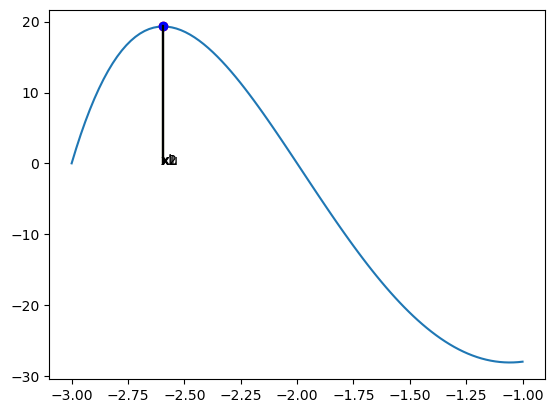

Iteration:  14
Error: 0.03493725021764632  xopt: -2.593815202754257  yopt: 19.322163832592125


In [8]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def function(x):
    #fx=x**4-16*(x**3)+45*(x**2)-20*x+203
    fx=x**5-2*x**4-23*x**3-12*x**2+36*x
    return fx

def update_interior(xl,xu):
    d=((np.sqrt(5)-1)/2)*(xu-xl)
    x1=xl+d
    x2=xu-d
    return x1,x2

def check_pos(x1,x2):
    if x2<x1:
        label='right'
    else:
        label=''
    return label

#FINDING MINIMUM FUNCTION

def find_max(xl,xu,x1,x2,label):
    fx1=function(x1)
    fx2=function(x2)
    if fx2>fx1 and label=='right':
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    else:
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    return xl,xu,xopt


def find_min(xl,xu,x1,x2,label):
    fx1=function(x1)
    fx2=function(x2)
    if fx2>fx1 and label=='right':
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    else:
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    return xl,xu,xopt,function(xopt)

#PLOTTING FUNCTION
def plot_graph(xl,xu,x1,x2):
    clear_output(wait=True)
    
    #plot function graph
    plt.plot(x,y)
    #plt.plot([xl,xu],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,function(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,function(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,function(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,function(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,function(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,function(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,function(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,function(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    #plt.ylim([-1.2,1.2])
    plt.show()

def golden_search(xl,xu,mode,et):
    it=0
    e=1

    while e>=et:
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        fx1=function(x1)
        fx2=function(x2)
        label=check_pos(x1,x2)
        clear_output(wait=True)
        plot_graph(xl,xu,x1,x2) #PLOTTING
        plt.show()
        
        #SELECTING AND UPDATING BOUNDARY-INTERIOR POINTS
        if mode=='max':
            new_boundary=find_max(xl,xu,x1,x2,label)
        elif mode=='min':
            new_boundary=find_min(xl,xu,x1,x2,label)
        else:
            print('Please define min/max mode')
            break #exit if mode not min or max
        xl=new_boundary[0]
        xu=new_boundary[1]
        xopt=new_boundary[2]
        
        it+=1
        print ('Iteration: ',it)
        r=(np.sqrt(5)-1)/2 #GOLDEN RATIO
        e=((1-r)*(abs((xu-xl)/xopt)))*100 #Error
        print('Error:',e,' xopt:',xopt,' yopt:',function(xopt))
        time.sleep(1)

#GENERATE POINT FOR SINE GRAPH   

#xl=2.4
#xu=14
xl=-3
xu=-1

x=np.linspace(xl,xu,100)
y=function(x)

#EXECUTING GOLDEN SEARCH FUNCTION
golden_search(xl,xu,'max',0.05)

In [37]:
from scipy import optimize
from scipy.optimize import line_search


def function(x):
    return x**4-16*x**3+45*x**2-20*x+203
def gradient(x):
    return 4*x**3-48*x**2+90*x-20



##Golden Search

print(optimize.golden(function,brack=(2.5,14)))

7.23815542253489
9.743416452353479
